In [85]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import numpy as np


In [86]:
#CONECTANDO AO BANCO DE DADOS
conn = psycopg2.connect(
    host = 'localhost',
    port = '5432',
    database = 'Desafio',
    user = 'postgres',
    password = '1234'
)

In [87]:
#CARREGANDO TABLES
def tabelaParaDataframe(tabela):
    query = f"SELECT * FROM {tabela}"
    return pd.read_sql(query, conn)

df_imoveis = tabelaParaDataframe('imoveis')
df_contribuintes = tabelaParaDataframe('contribuintes')
df_pagamentos = tabelaParaDataframe('pagamentos')
df_situacao = tabelaParaDataframe('situacao')
df_tipo_tributo = tabelaParaDataframe('tipotributos')
df_titulos = tabelaParaDataframe('titulos')

C:\Users\Raul\AppData\Local\Temp\ipykernel_19068\217023218.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [88]:
#FUNCAO PARA ANALISE EXPLORATORIA
def AnaliseExploratoria(df, table):
    print(f'Analise da tabela: {table}')
    print("Primeiras 5 linhas:")
    display(df.head())
    print("\nInformações:")
    display(df.info())
    print("\nDescrição estatística:")
    display(df.describe(include='all'))
    print("\nValores nulos:")
    display(df.isnull().sum())
    
# FUNCAO PARA NORMALIZACAO
def Normalizacao(df,coluna):
    media = df[coluna].sum() / len(df[coluna])
    df[coluna] = df[coluna] / media
    print('Media',coluna,media)
    
def CriarGrafico(df,coluna):
    count = df[coluna].value_counts()
    plt.figure(figsize=(10, 5))
    count.plot(kind='bar')
    print(count)

# CONTRIBUINTES

In [89]:
AnaliseExploratoria(df_contribuintes, 'contribuintes')

Analise da tabela: contribuintes
Primeiras 5 linhas:


,Codi_Cont,SituacaoContribuinte,Desc_Bair,AtividadeContribuinte,DescricaoAtividadeContribuinte
0,218,Ativa,ZONA INDUSTRIAL NOVA,30102,"METAIS,MADEIRAS,MINERAIS,PEDRAS E CONGENERES ..."
1,454,Ativa,NAÇÕES UNIDAS,11314,ESCRITORIOS PRESTACAO DE SERVICOS ...
2,1620,Ativa,PRAIA DOS VARADOURES,11903,MECANICO ...
3,2899,Ativa,PRAIA DO MAR ALTO,11508,AMBULATORIO OU POSTO DE ENFERMAGEN ...
4,2909,Ativa,ZONA INDUSTRIAL NOVA,30102,"METAIS,MADEIRAS,MINERAIS,PEDRAS E CONGENERES ..."



Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29027 entries, 0 to 29026
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Codi_Cont                       29027 non-null  int64 
 1   SituacaoContribuinte            29027 non-null  object
 2   Desc_Bair                       24258 non-null  object
 3   AtividadeContribuinte           29027 non-null  object
 4   DescricaoAtividadeContribuinte  29027 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


None


Descrição estatística:


,Codi_Cont,SituacaoContribuinte,Desc_Bair,AtividadeContribuinte,DescricaoAtividadeContribuinte
count,29027.000000,29027,24258,29027,29027
unique,NaN,4,66,366,353
top,NaN,Ativa,JARDIM DAS ACÁCIAS,11939,VENDEDOR ...
freq,NaN,27877,1790,4737,4737
mean,107028.924381,NaN,NaN,NaN,NaN
std,77735.441499,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN
25%,50767.500000,NaN,NaN,NaN,NaN
50%,86502.000000,NaN,NaN,NaN,NaN
75%,116077.500000,NaN,NaN,NaN,NaN



Valores nulos:


Codi_Cont                            0
SituacaoContribuinte                 0
Desc_Bair                         4769
AtividadeContribuinte                0
DescricaoAtividadeContribuinte       0
dtype: int64

In [90]:
#CONVERTENDO A COLUNA AtividadeContribuinte PARA INTEIRO
df_contribuintes['AtividadeContribuinte'] = df_contribuintes['AtividadeContribuinte'].astype('int64')
df_contribuintes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29027 entries, 0 to 29026
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Codi_Cont                       29027 non-null  int64 
 1   SituacaoContribuinte            29027 non-null  object
 2   Desc_Bair                       24258 non-null  object
 3   AtividadeContribuinte           29027 non-null  int64 
 4   DescricaoAtividadeContribuinte  29027 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


SituacaoContribuinte
Ativa                             27877
Baixada                             640
Suspensa                            415
Irregular                            95
Name: count, dtype: int64


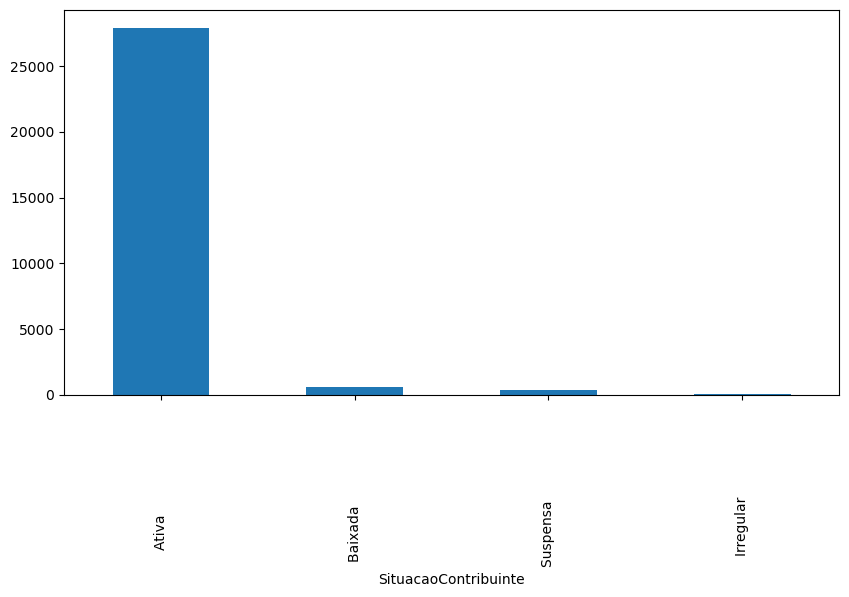

In [91]:
# ANALISANDO COLUNA SituacaoContribuinte

SitConCount = df_contribuintes['SituacaoContribuinte'].value_counts()

plt.figure(figsize=(10, 5))
SitConCount.plot(kind='bar')
print(SitConCount)

In [92]:
#SUBSTITUINDO VALORES NULOS DA COLUNA Desc_Bair (19%)
df_contribuintes['Desc_Bair'] = df_contribuintes['Desc_Bair'].fillna('DESCONHECIDO')
df_contribuintes.isnull().sum()

Codi_Cont                         0
SituacaoContribuinte              0
Desc_Bair                         0
AtividadeContribuinte             0
DescricaoAtividadeContribuinte    0
dtype: int64

In [93]:
AtividadeCount = df_contribuintes['AtividadeContribuinte'].value_counts()
print(AtividadeCount)

AtividadeContribuinte
11939    4737
11860    3164
11701    1854
11703    1768
11901    1344
         ... 
11949       1
11201       1
20137       1
11733       1
20136       1
Name: count, Length: 366, dtype: int64


Desc_Bair
VILA GONDIM                       226
COLINAS DAS TRENCHERAS            203
VILA SÁTIRO                       197
.                                 187
PARQUE JOÃO PAULO                 164
COLINAS DO SOL                    164
VILA DA LAGOA                     140
JARDIM FLORENÇA                   139
VILA PAULISTA                     132
PARQUE DOS INGLESES               117
ILHA DA PAZ                       115
RESIDENCIAL PORTAL DO SOL         103
ALTO DA ESPERANÇA                  95
RESIDENCIAL PARATY                 92
PARQUE INDUSTRIAL NOVO             92
ZONA INDUSTRIAL NOVA               82
CIDADE DOS PÁSSAROS                76
VILA SÃO BENTO                     68
VALE ENCANTADO                     63
FLORESTA REAL                      59
VILA SÃO FRANCISCO                 57
VILA DOS CAMPOS                    57
VILA AGRIPINA                      54
VALE DO SILÊNCIO                   41
VILA PENHA DO MAR                  18
PONTA DO FAROL                     18
JA

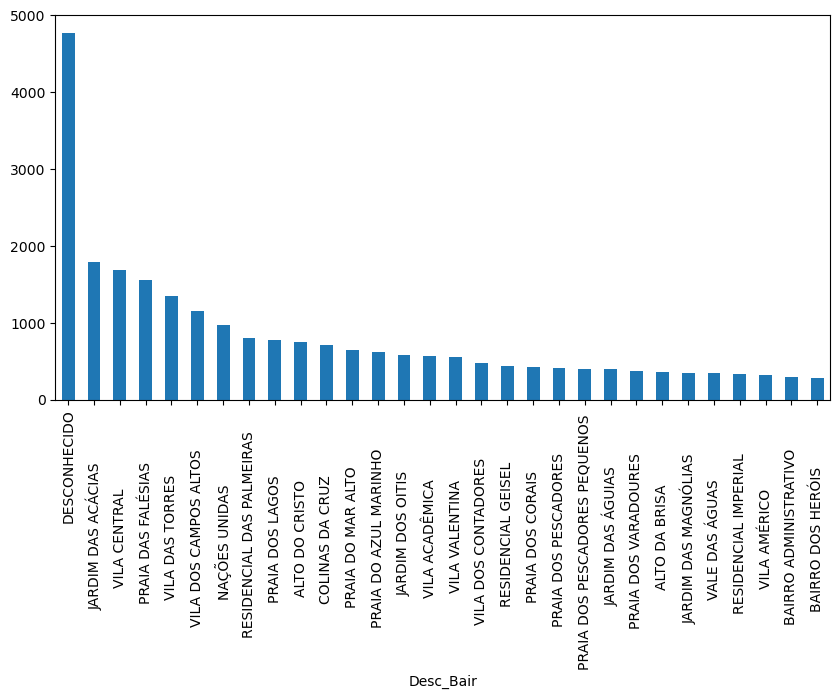

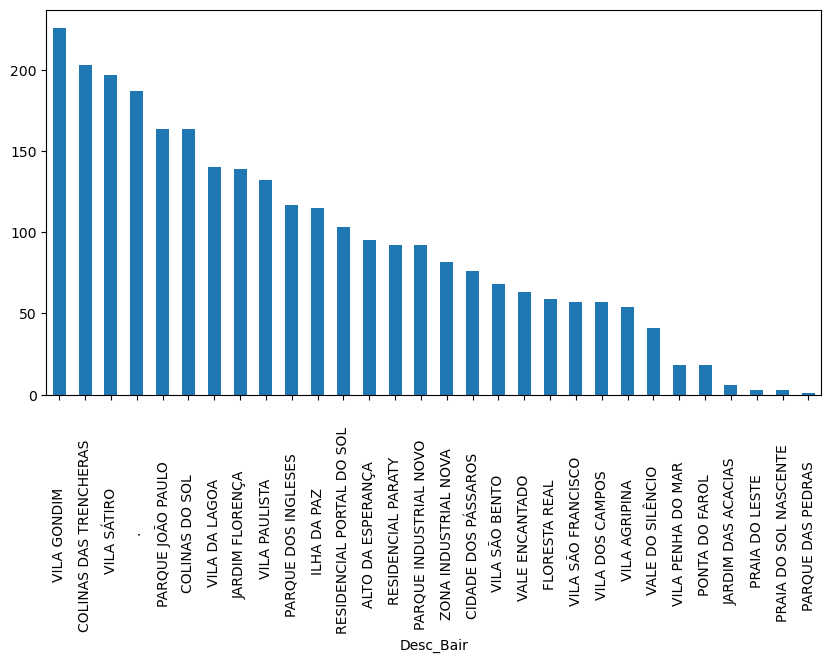

In [94]:
#ANALISE DA COLUNA Desc_Bair
bairroCount = df_contribuintes['Desc_Bair'].value_counts()

plt.figure(figsize=(10, 5))
bairroCount[:30].plot(kind='bar')

plt.figure(figsize=(10, 5))
bairroCount[-30:].plot(kind='bar')

bairroCount[-30:]
#REMOVER (QUALITATIVA)

In [95]:
#
bairroCount[-30:]

Desc_Bair
VILA GONDIM                       226
COLINAS DAS TRENCHERAS            203
VILA SÁTIRO                       197
.                                 187
PARQUE JOÃO PAULO                 164
COLINAS DO SOL                    164
VILA DA LAGOA                     140
JARDIM FLORENÇA                   139
VILA PAULISTA                     132
PARQUE DOS INGLESES               117
ILHA DA PAZ                       115
RESIDENCIAL PORTAL DO SOL         103
ALTO DA ESPERANÇA                  95
RESIDENCIAL PARATY                 92
PARQUE INDUSTRIAL NOVO             92
ZONA INDUSTRIAL NOVA               82
CIDADE DOS PÁSSAROS                76
VILA SÃO BENTO                     68
VALE ENCANTADO                     63
FLORESTA REAL                      59
VILA SÃO FRANCISCO                 57
VILA DOS CAMPOS                    57
VILA AGRIPINA                      54
VALE DO SILÊNCIO                   41
VILA PENHA DO MAR                  18
PONTA DO FAROL                     18
JA

In [96]:
# REMOVENDO POSSIVEIS OUTLIERS 
#limite = bairroCount.sum() * 0.001
#bairroCount = bairroCount[bairroCount >= limite]

#df_contribuintes = df_contribuintes[df_contribuintes['Desc_Bair'].isin(bairroCount.index)]
#bairroCount = df_contribuintes['Desc_Bair'].value_counts()

#plt.figure(figsize=(10, 5))
#bairroCount[30:].plot(kind='bar')

<Axes: xlabel='AtividadeContribuinte'>

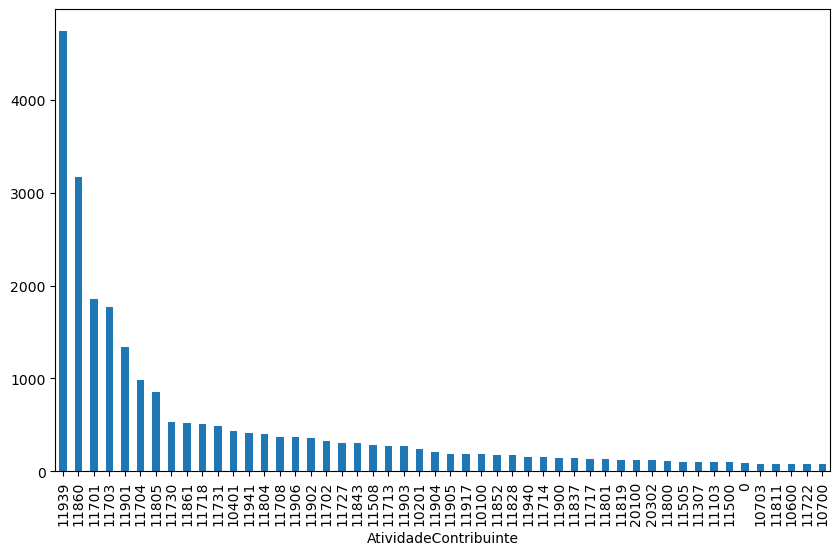

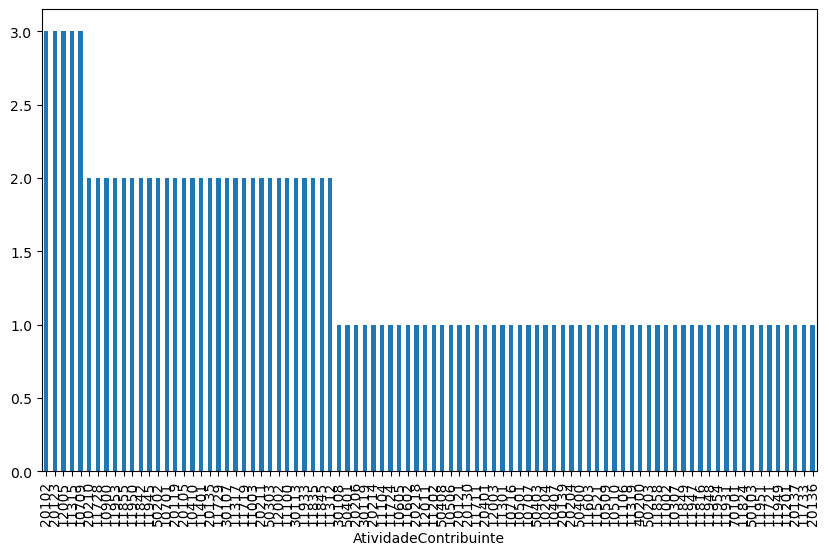

In [97]:
# ANALSIE DA COLUNA AtividadeContribuinte

AtivCount = df_contribuintes['AtividadeContribuinte'].value_counts()

plt.figure(figsize=(10, 5))
AtivCount[:50].plot(kind='bar', figsize=(10, 6))
plt.figure(figsize=(10, 5))
AtivCount[-90:].plot(kind='bar', figsize=(10, 6))

In [98]:
# ANALSIANDO QUANDO SituacaoContribuinte == Irregular
irregular = df_contribuintes[(df_contribuintes['SituacaoContribuinte'] == 'Irregular                     ')]
irregular.head(20)


,Codi_Cont,SituacaoContribuinte,Desc_Bair,AtividadeContribuinte,DescricaoAtividadeContribuinte
12052,78130,Irregular,JARDIM DOS OITIS,40200,ENT.REG.DIR. PUBLICO-ESTADUAL ...
13379,115313,Irregular,PRAIA DAS FALÉSIAS,50406,CONDOMÍNIO EDIFÍCIO RESIDENCIAL ...
14633,110225,Irregular,VILA CENTRAL,50103,SINDICATO ...
15818,135478,Irregular,DESCONHECIDO,0,INDEFINIDO ...
15852,204236,Irregular,DESCONHECIDO,0,INDEFINIDO ...
15900,123654,Irregular,DESCONHECIDO,0,INDEFINIDO ...
16863,204428,Irregular,DESCONHECIDO,0,INDEFINIDO ...
16872,205563,Irregular,DESCONHECIDO,0,INDEFINIDO ...
17499,113872,Irregular,DESCONHECIDO,0,INDEFINIDO ...
18011,118652,Irregular,DESCONHECIDO,0,INDEFINIDO ...


In [99]:
AnaliseExploratoria(df_contribuintes, 'contribuintes')

Analise da tabela: contribuintes
Primeiras 5 linhas:


,Codi_Cont,SituacaoContribuinte,Desc_Bair,AtividadeContribuinte,DescricaoAtividadeContribuinte
0,218,Ativa,ZONA INDUSTRIAL NOVA,30102,"METAIS,MADEIRAS,MINERAIS,PEDRAS E CONGENERES ..."
1,454,Ativa,NAÇÕES UNIDAS,11314,ESCRITORIOS PRESTACAO DE SERVICOS ...
2,1620,Ativa,PRAIA DOS VARADOURES,11903,MECANICO ...
3,2899,Ativa,PRAIA DO MAR ALTO,11508,AMBULATORIO OU POSTO DE ENFERMAGEN ...
4,2909,Ativa,ZONA INDUSTRIAL NOVA,30102,"METAIS,MADEIRAS,MINERAIS,PEDRAS E CONGENERES ..."



Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29027 entries, 0 to 29026
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Codi_Cont                       29027 non-null  int64 
 1   SituacaoContribuinte            29027 non-null  object
 2   Desc_Bair                       29027 non-null  object
 3   AtividadeContribuinte           29027 non-null  int64 
 4   DescricaoAtividadeContribuinte  29027 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


None


Descrição estatística:


,Codi_Cont,SituacaoContribuinte,Desc_Bair,AtividadeContribuinte,DescricaoAtividadeContribuinte
count,29027.000000,29027,29027,29027.000000,29027
unique,NaN,4,67,NaN,353
top,NaN,Ativa,DESCONHECIDO,NaN,VENDEDOR ...
freq,NaN,27877,4769,NaN,4737
mean,107028.924381,NaN,NaN,12052.534709,NaN
std,77735.441499,NaN,NaN,2824.281268,NaN
min,16.000000,NaN,NaN,0.000000,NaN
25%,50767.500000,NaN,NaN,11703.000000,NaN
50%,86502.000000,NaN,NaN,11837.000000,NaN
75%,116077.500000,NaN,NaN,11907.000000,NaN



Valores nulos:


Codi_Cont                         0
SituacaoContribuinte              0
Desc_Bair                         0
AtividadeContribuinte             0
DescricaoAtividadeContribuinte    0
dtype: int64

# IMOVEIS

In [100]:
AnaliseExploratoria(df_imoveis, 'imoveis')

Analise da tabela: imoveis
Primeiras 5 linhas:


,Codi_Imov,Atividade,Tipo_Imovel,Desc_Bair,Coleta,Rede_Esgo,Garagem,Area_Terreno,Area_Predial,Patrimonio,VV_EDIFICACAO,VV_TERRENO,VV_TOTAL_IMOVEL
0,470959,RESIDENCIAIS ...,PREDIAL,RESIDENCIAL GEISEL,SIM,SEM REDE DE ESGOTO ...,SIM,4168.22,64.28,PRIVADO,32180.21,361.73,32541.94
1,286325,RESIDENCIAIS ...,PREDIAL,JARDIM DAS ACÁCIAS,SIM,SEM REDE DE ESGOTO ...,NAO,287.00,51.55,PRIVADO,10301.99,5355.53,15657.52
2,417130,RESIDENCIAIS ...,PREDIAL,VALE DO SILÊNCIO,SIM,SEM REDE DE ESGOTO ...,SIM,13633.45,43.71,PRIVADO,30452.02,112.80,30564.82
3,470929,IGREJAS/TEMPLOS DE QUALQUER CULTO ...,PREDIAL,RESIDENCIAL GEISEL,SIM,COM REDE DE ESGOTO ...,NAO,330.00,170.00,PRIVADO,111188.69,1742.86,112931.55
4,482926,RESIDENCIAIS ...,PREDIAL,JARDIM GRAMADO,SIM,SEM REDE DE ESGOTO ...,SIM,4174.90,41.45,PRIVADO,17652.24,203.67,17855.91



Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276224 entries, 0 to 276223
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Codi_Imov        276224 non-null  object 
 1   Atividade        276224 non-null  object 
 2   Tipo_Imovel      276224 non-null  object 
 3   Desc_Bair        276224 non-null  object 
 4   Coleta           276224 non-null  object 
 5   Rede_Esgo        276224 non-null  object 
 6   Garagem          256888 non-null  object 
 7   Area_Terreno     276224 non-null  float64
 8   Area_Predial     256888 non-null  float64
 9   Patrimonio       276224 non-null  object 
 10  VV_EDIFICACAO    268932 non-null  float64
 11  VV_TERRENO       268810 non-null  float64
 12  VV_TOTAL_IMOVEL  268810 non-null  float64
dtypes: float64(5), object(8)
memory usage: 27.4+ MB


None


Descrição estatística:


,Codi_Imov,Atividade,Tipo_Imovel,Desc_Bair,Coleta,Rede_Esgo,Garagem,Area_Terreno,Area_Predial,Patrimonio,VV_EDIFICACAO,VV_TERRENO,VV_TOTAL_IMOVEL
count,276224,276224,276224,276224,276224,276224,256888,2.762240e+05,256888.000000,276224,2.689320e+05,2.688100e+05,2.688100e+05
unique,276224,337,3,65,2,2,3,NaN,NaN,5,NaN,NaN,NaN
top,470959,RESIDENCIAIS ...,PREDIAL,JARDIM GRAMADO,SIM,SEM REDE DE ESGOTO ...,SIM,NaN,NaN,PRIVADO,NaN,NaN,NaN
freq,1,199622,254999,32494,275836,182299,137465,NaN,NaN,271139,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.158450e+03,110.781840,NaN,3.674569e+04,4.731923e+03,4.146954e+04
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.896391e+04,402.191991,NaN,1.440077e+05,2.881018e+04,1.550694e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,0.000000e+00,0.000000e+00,1.128000e+01
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+02,49.720000,NaN,1.498941e+04,4.933900e+02,1.695031e+04
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.720000e+02,73.630000,NaN,2.474115e+04,1.428120e+03,2.668041e+04
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.271020e+03,122.620000,NaN,3.911696e+04,3.157215e+03,4.262532e+04



Valores nulos:


Codi_Imov              0
Atividade              0
Tipo_Imovel            0
Desc_Bair              0
Coleta                 0
Rede_Esgo              0
Garagem            19336
Area_Terreno           0
Area_Predial       19336
Patrimonio             0
VV_EDIFICACAO       7292
VV_TERRENO          7414
VV_TOTAL_IMOVEL     7414
dtype: int64

In [101]:
# CONVERTENDO COLUNA Codi_Imov

df_imoveis['Codi_Imov']= df_imoveis['Codi_Imov'].astype('int64')
df_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276224 entries, 0 to 276223
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Codi_Imov        276224 non-null  int64  
 1   Atividade        276224 non-null  object 
 2   Tipo_Imovel      276224 non-null  object 
 3   Desc_Bair        276224 non-null  object 
 4   Coleta           276224 non-null  object 
 5   Rede_Esgo        276224 non-null  object 
 6   Garagem          256888 non-null  object 
 7   Area_Terreno     276224 non-null  float64
 8   Area_Predial     256888 non-null  float64
 9   Patrimonio       276224 non-null  object 
 10  VV_EDIFICACAO    268932 non-null  float64
 11  VV_TERRENO       268810 non-null  float64
 12  VV_TOTAL_IMOVEL  268810 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 27.4+ MB


As 10 mais frequentes: Atividade
RESIDENCIAIS                                                              199622
VAZIOS URBANOS                                                             18232
RESIDENCIAL FECHADO                                                         8299
APART-HOTEL OU FLAT                                                         4231
ESCRITORIOS PRESTACAO DE  SERVICOS                                          2989
MERCANTIL SIMEI                                                             2043
COMERCIO FECHADO                                                            2042
BAR, RESTAURANTE, LANCHONETE                                                1963
EM CONSTRUCAO                                                               1850
ESTACIONAMENTO E GUARDA DE VEICULOS                                         1839
Name: count, dtype: int64


<Axes: xlabel='Atividade'>

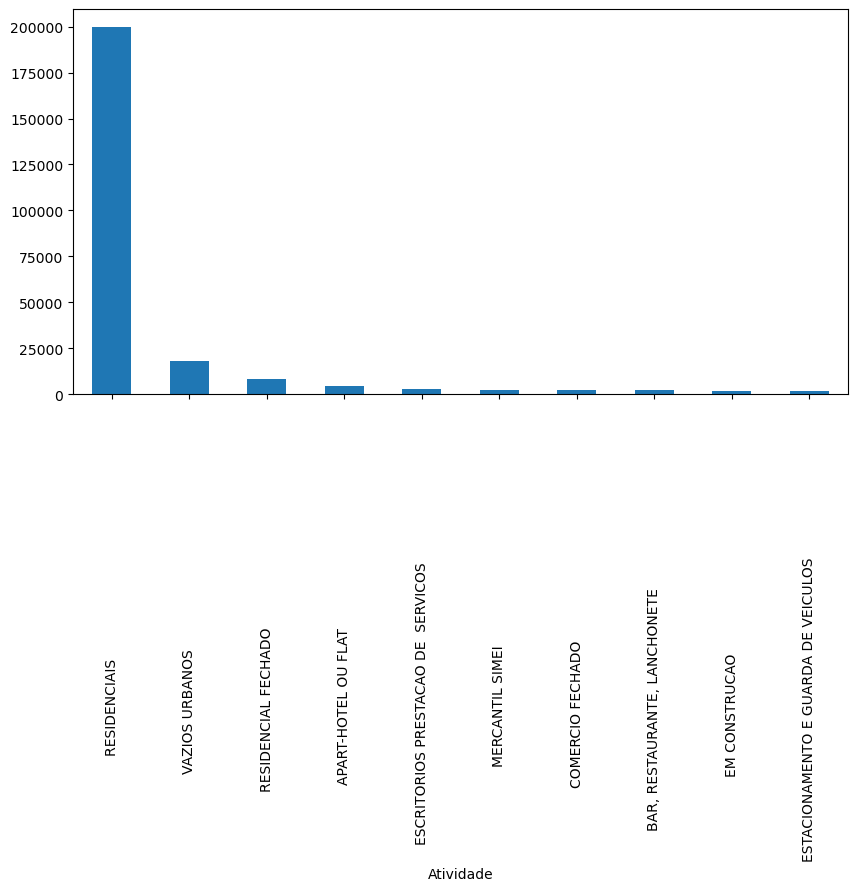

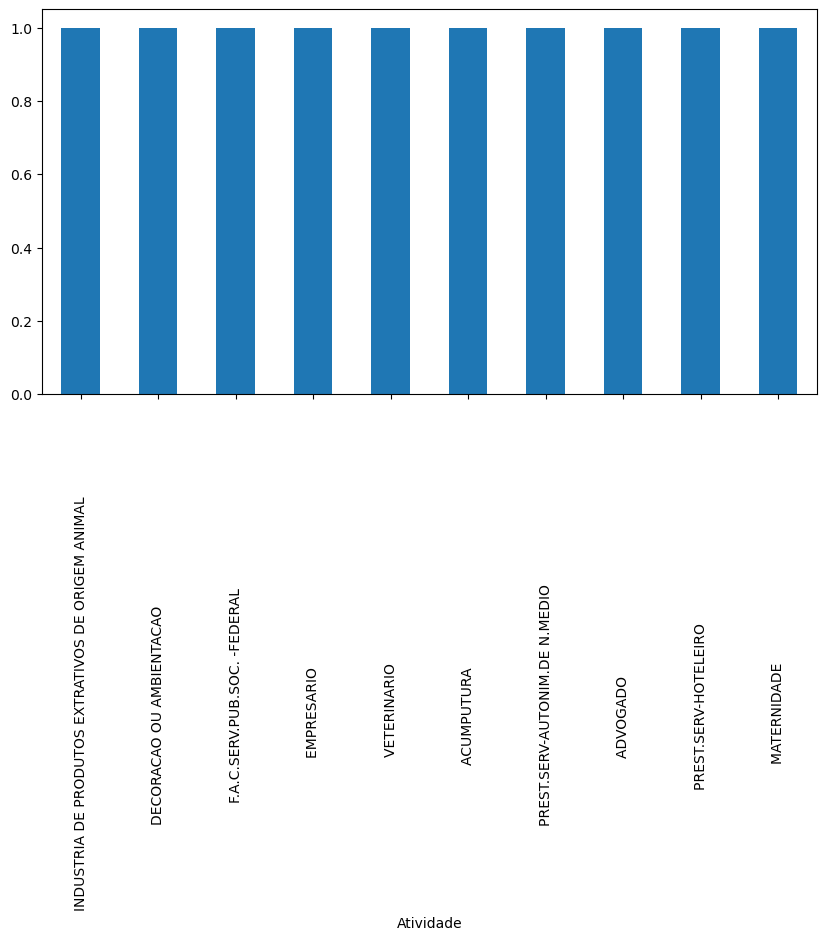

In [102]:
# ANALISANDO Atividade
AtivdImovCount = df_imoveis['Atividade'].value_counts()

plt.figure(figsize=(10, 5))
AtivdImovCount[:10].plot(kind='bar')
print('As 10 mais frequentes:',AtivdImovCount[:10])

plt.figure(figsize=(10, 5))
AtivdImovCount[-10:].plot(kind='bar')


As 10 mais frequentes: Desc_Bair
JARDIM GRAMADO                    32494
JARDIM DAS ACÁCIAS                21832
PRAIA DAS FALÉSIAS                 9352
ALTO DO CRISTO                     9013
RESIDENCIAL PARATY                 8695
VILA ACADÊMICA                     8044
PRAIA DOS LAGOS                    7850
JARDIM DOS OITIS                   6815
VALE DO SILÊNCIO                   6726
VILA DOS CAMPOS                    6618
Name: count, dtype: int64


<Axes: xlabel='Desc_Bair'>

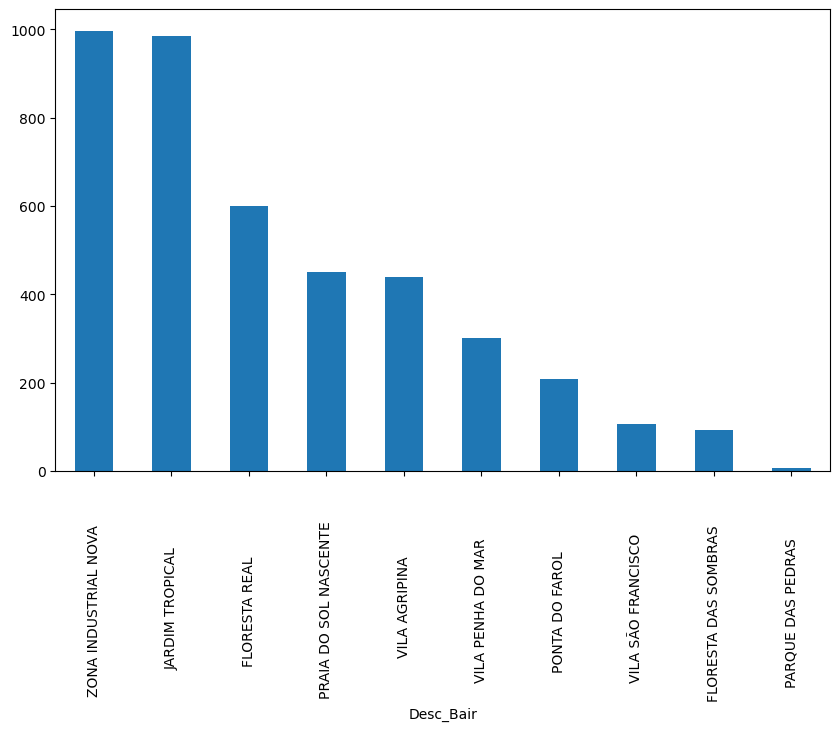

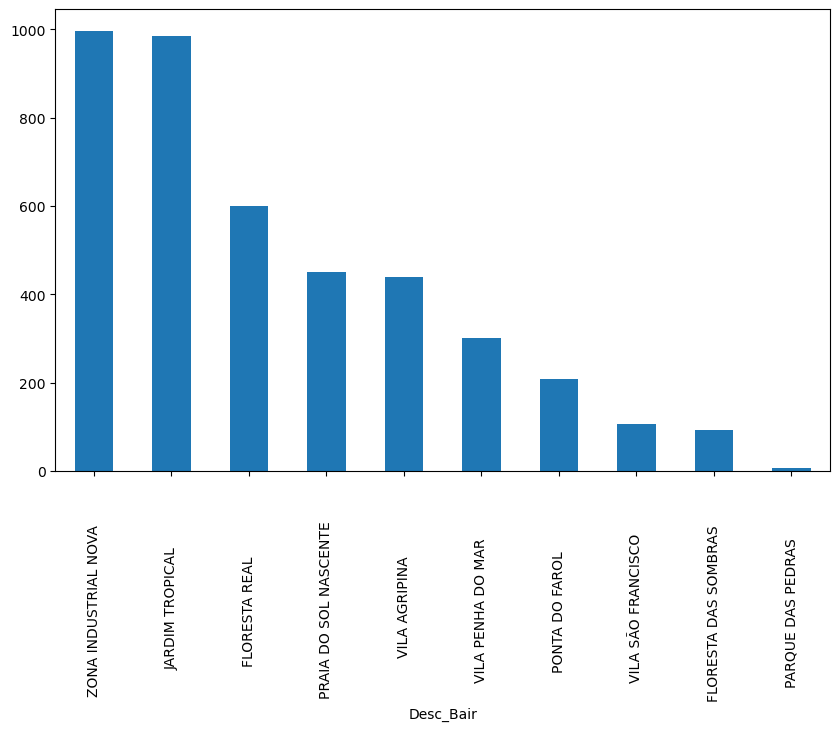

In [103]:
# ANALISANDO COLUNA Desc_Bair

BairroImovCount = df_imoveis['Desc_Bair'].value_counts()

print('As 10 mais frequentes:',BairroImovCount[:10])

plt.figure(figsize=(10, 5))
BairroImovCount[-10:].plot(kind='bar', figsize=(10, 6))


plt.figure(figsize=(10, 5))
BairroImovCount[-10:].plot(kind='bar', figsize=(10, 6))




In [104]:
# ANALISANDO VALORES NULOS DE Garagem
df_imoveis['Garagem'].unique()

array(['SIM                 ', 'NAO                 ', None,
       'INDEFINIDO          '], dtype=object)

In [105]:
# SUBSTITUINDO VALORE NULOS POR DESCONHECIDO

df_imoveis['Garagem'] = df_imoveis['Garagem'].fillna('Desconhecido')
df_imoveis.isnull().sum()

df_imoveis['Garagem'].unique()

array(['SIM                 ', 'NAO                 ', 'Desconhecido',
       'INDEFINIDO          '], dtype=object)

In [106]:
# REALIZANDO NORMALIZAÇÃO EM Area_Terreno E Area_Predial

Normalizacao(df_imoveis,'Area_Terreno')
Normalizacao(df_imoveis,'Area_Predial')

df_imoveis.head()

Media Area_Terreno 3158.4496244352413
Media Area_Predial 103.0269825214319


,Codi_Imov,Atividade,Tipo_Imovel,Desc_Bair,Coleta,Rede_Esgo,Garagem,Area_Terreno,Area_Predial,Patrimonio,VV_EDIFICACAO,VV_TERRENO,VV_TOTAL_IMOVEL
0,470959,RESIDENCIAIS ...,PREDIAL,RESIDENCIAL GEISEL,SIM,SEM REDE DE ESGOTO ...,SIM,1.319704,0.623914,PRIVADO,32180.21,361.73,32541.94
1,286325,RESIDENCIAIS ...,PREDIAL,JARDIM DAS ACÁCIAS,SIM,SEM REDE DE ESGOTO ...,NAO,0.090867,0.500354,PRIVADO,10301.99,5355.53,15657.52
2,417130,RESIDENCIAIS ...,PREDIAL,VALE DO SILÊNCIO,SIM,SEM REDE DE ESGOTO ...,SIM,4.316501,0.424258,PRIVADO,30452.02,112.80,30564.82
3,470929,IGREJAS/TEMPLOS DE QUALQUER CULTO ...,PREDIAL,RESIDENCIAL GEISEL,SIM,COM REDE DE ESGOTO ...,NAO,0.104482,1.650053,PRIVADO,111188.69,1742.86,112931.55
4,482926,RESIDENCIAIS ...,PREDIAL,JARDIM GRAMADO,SIM,SEM REDE DE ESGOTO ...,SIM,1.321819,0.402322,PRIVADO,17652.24,203.67,17855.91


In [107]:
# ANALISANDO COLUNAS VV
df_imoveis[['VV_EDIFICACAO','VV_TERRENO','VV_TOTAL_IMOVEL']].describe()

,VV_EDIFICACAO,VV_TERRENO,VV_TOTAL_IMOVEL
count,2.689320e+05,2.688100e+05,2.688100e+05
mean,3.674569e+04,4.731923e+03,4.146954e+04
std,1.440077e+05,2.881018e+04,1.550694e+05
min,0.000000e+00,0.000000e+00,1.128000e+01
25%,1.498941e+04,4.933900e+02,1.695031e+04
50%,2.474115e+04,1.428120e+03,2.668041e+04
75%,3.911696e+04,3.157215e+03,4.262532e+04
max,3.141236e+07,7.991042e+06,3.164426e+07


In [108]:
# NORMALIZACAO DAS COLUNAS VV

Normalizacao(df_imoveis,'VV_EDIFICACAO')
Normalizacao(df_imoveis,'VV_TERRENO')
Normalizacao(df_imoveis,'VV_TOTAL_IMOVEL')

df_imoveis[['VV_EDIFICACAO','VV_TERRENO','VV_TOTAL_IMOVEL']].describe()

Media VV_EDIFICACAO 35775.65015585178
Media VV_TERRENO 4604.915353191613
Media VV_TOTAL_IMOVEL 40356.47907169543


,VV_EDIFICACAO,VV_TERRENO,VV_TOTAL_IMOVEL
count,268932.000000,268810.000000,268810.000000
mean,1.027115,1.027581,1.027581
std,4.025298,6.256398,3.842490
min,0.000000,0.000000,0.000280
25%,0.418984,0.107144,0.420015
50%,0.691564,0.310129,0.661118
75%,1.093396,0.685618,1.056220
max,878.037499,1735.328717,784.118569


In [109]:
df_imoveis.isnull().sum()

Codi_Imov              0
Atividade              0
Tipo_Imovel            0
Desc_Bair              0
Coleta                 0
Rede_Esgo              0
Garagem                0
Area_Terreno           0
Area_Predial       19336
Patrimonio             0
VV_EDIFICACAO       7292
VV_TERRENO          7414
VV_TOTAL_IMOVEL     7414
dtype: int64

In [110]:
# REMOVENDO VALORES NULOS ABAIXO DE 20%

df_imoveis = df_imoveis.dropna(subset=['VV_EDIFICACAO','VV_TERRENO','VV_TOTAL_IMOVEL'])
df_imoveis['Area_Predial'] = df_imoveis[['Area_Predial']].fillna(0)
df_imoveis[['Area_Predial','VV_EDIFICACAO']]

,Area_Predial,VV_EDIFICACAO
0,0.623914,0.899500
1,0.500354,0.287961
2,0.424258,0.851194
3,1.650053,3.107943
4,0.402322,0.493415
...,...,...
276219,0.550341,0.447346
276220,1.385851,0.840900
276221,0.439788,0.647042
276222,1.059140,0.642660


In [111]:
AnaliseExploratoria(df_imoveis, 'imoveis')

Analise da tabela: imoveis
Primeiras 5 linhas:


,Codi_Imov,Atividade,Tipo_Imovel,Desc_Bair,Coleta,Rede_Esgo,Garagem,Area_Terreno,Area_Predial,Patrimonio,VV_EDIFICACAO,VV_TERRENO,VV_TOTAL_IMOVEL
0,470959,RESIDENCIAIS ...,PREDIAL,RESIDENCIAL GEISEL,SIM,SEM REDE DE ESGOTO ...,SIM,1.319704,0.623914,PRIVADO,0.899500,0.078553,0.806362
1,286325,RESIDENCIAIS ...,PREDIAL,JARDIM DAS ACÁCIAS,SIM,SEM REDE DE ESGOTO ...,NAO,0.090867,0.500354,PRIVADO,0.287961,1.163003,0.387980
2,417130,RESIDENCIAIS ...,PREDIAL,VALE DO SILÊNCIO,SIM,SEM REDE DE ESGOTO ...,SIM,4.316501,0.424258,PRIVADO,0.851194,0.024496,0.757371
3,470929,IGREJAS/TEMPLOS DE QUALQUER CULTO ...,PREDIAL,RESIDENCIAL GEISEL,SIM,COM REDE DE ESGOTO ...,NAO,0.104482,1.650053,PRIVADO,3.107943,0.378478,2.798350
4,482926,RESIDENCIAIS ...,PREDIAL,JARDIM GRAMADO,SIM,SEM REDE DE ESGOTO ...,SIM,1.321819,0.402322,PRIVADO,0.493415,0.044229,0.442455



Informações:
<class 'pandas.core.frame.DataFrame'>
Index: 268810 entries, 0 to 276223
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Codi_Imov        268810 non-null  int64  
 1   Atividade        268810 non-null  object 
 2   Tipo_Imovel      268810 non-null  object 
 3   Desc_Bair        268810 non-null  object 
 4   Coleta           268810 non-null  object 
 5   Rede_Esgo        268810 non-null  object 
 6   Garagem          268810 non-null  object 
 7   Area_Terreno     268810 non-null  float64
 8   Area_Predial     268810 non-null  float64
 9   Patrimonio       268810 non-null  object 
 10  VV_EDIFICACAO    268810 non-null  float64
 11  VV_TERRENO       268810 non-null  float64
 12  VV_TOTAL_IMOVEL  268810 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 28.7+ MB


None


Descrição estatística:


,Codi_Imov,Atividade,Tipo_Imovel,Desc_Bair,Coleta,Rede_Esgo,Garagem,Area_Terreno,Area_Predial,Patrimonio,VV_EDIFICACAO,VV_TERRENO,VV_TOTAL_IMOVEL
count,268810.000000,268810,268810,268810,268810,268810,268810,268810.000000,268810.000000,268810,268810.000000,268810.000000,268810.000000
unique,NaN,327,3,65,2,2,4,NaN,NaN,5,NaN,NaN,NaN
top,NaN,RESIDENCIAIS ...,PREDIAL,JARDIM GRAMADO,SIM,SEM REDE DE ESGOTO ...,SIM,NaN,NaN,PRIVADO,NaN,NaN,NaN
freq,NaN,195994,249626,30641,268434,176933,135263,NaN,NaN,265293,NaN,NaN,NaN
mean,263986.070317,NaN,NaN,NaN,NaN,NaN,NaN,0.991789,0.970503,NaN,1.026889,1.027581,1.027581
std,145026.467956,NaN,NaN,NaN,NaN,NaN,NaN,9.264375,3.052250,NaN,4.026171,6.256398,3.842490
min,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000280
25%,136570.250000,NaN,NaN,NaN,NaN,NaN,NaN,0.063322,0.450076,NaN,0.418984,0.107144,0.420015
50%,278518.500000,NaN,NaN,NaN,NaN,NaN,NaN,0.116526,0.672542,NaN,0.691259,0.310129,0.661118
75%,390089.750000,NaN,NaN,NaN,NaN,NaN,NaN,0.387849,1.146399,NaN,1.092643,0.685618,1.056220



Valores nulos:


Codi_Imov          0
Atividade          0
Tipo_Imovel        0
Desc_Bair          0
Coleta             0
Rede_Esgo          0
Garagem            0
Area_Terreno       0
Area_Predial       0
Patrimonio         0
VV_EDIFICACAO      0
VV_TERRENO         0
VV_TOTAL_IMOVEL    0
dtype: int64

# PAGAMENTOS

In [112]:
AnaliseExploratoria(df_pagamentos, 'Pagamentos')

Analise da tabela: Pagamentos
Primeiras 5 linhas:


,Nume_Titu,Nume_Parc,Codi_Tipo,Valor_Titulo,Data_Paga,Peri_Refe,Valor_Pago
0,202301633491,01,1342,291.324316,2023-04-26,202303,50.106382
1,202301633491,02,1342,291.324316,2023-05-08,202303,48.552992
2,202301633491,03,1342,291.324316,2023-06-07,202303,48.552992
3,202301633491,04,1342,291.324316,2023-07-03,202303,48.552992
4,202301633491,05,1342,291.324316,2023-08-07,202303,48.552992



Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475448 entries, 0 to 475447
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Nume_Titu     475448 non-null  object        
 1   Nume_Parc     475448 non-null  object        
 2   Codi_Tipo     475448 non-null  object        
 3   Valor_Titulo  475448 non-null  float64       
 4   Data_Paga     475448 non-null  datetime64[ns]
 5   Peri_Refe     475448 non-null  object        
 6   Valor_Pago    475448 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 25.4+ MB


None


Descrição estatística:


,Nume_Titu,Nume_Parc,Codi_Tipo,Valor_Titulo,Data_Paga,Peri_Refe,Valor_Pago
count,475448,475448,475448,475448.000000,475448,475448,475448.000000
unique,191921,18,13,NaN,NaN,30,NaN
top,202301468447,01,1120,NaN,NaN,2023,NaN
freq,18,193604,333528,NaN,NaN,233831,NaN
mean,NaN,NaN,NaN,310.668466,2023-10-28 08:09:43.197253888,NaN,253.623599
min,NaN,NaN,NaN,-539.261936,1999-08-26 00:00:00,NaN,0.003183
25%,NaN,NaN,NaN,14.419790,2023-06-02 00:00:00,NaN,14.410240
50%,NaN,NaN,NaN,23.727398,2023-10-09 00:00:00,NaN,22.441395
75%,NaN,NaN,NaN,70.029884,2024-04-05 00:00:00,NaN,59.825415
max,NaN,NaN,NaN,421497.388522,2024-07-08 00:00:00,NaN,421497.388522



Valores nulos:


Nume_Titu       0
Nume_Parc       0
Codi_Tipo       0
Valor_Titulo    0
Data_Paga       0
Peri_Refe       0
Valor_Pago      0
dtype: int64

In [113]:
# CONVERTENDO Nume_Titu EM INTEIRO

df_pagamentos['Nume_Titu'] = df_pagamentos['Nume_Titu'].astype('int64')
df_pagamentos['Nume_Titu'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 475448 entries, 0 to 475447
Series name: Nume_Titu
Non-Null Count   Dtype
--------------   -----
475448 non-null  int64
dtypes: int64(1)
memory usage: 3.6 MB


count     475448
unique        18
top           01
freq      193604
Name: Nume_Parc, dtype: object
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18']
Nume_Parc
01    193604
02     53926
03     51377
04     48030
05     41257
06     22931
07     19297
08     16927
09     14954
10     12957
11        80
12        67
13        11
14         9
15         7
16         7
17         4
18         3
Name: count, dtype: int64


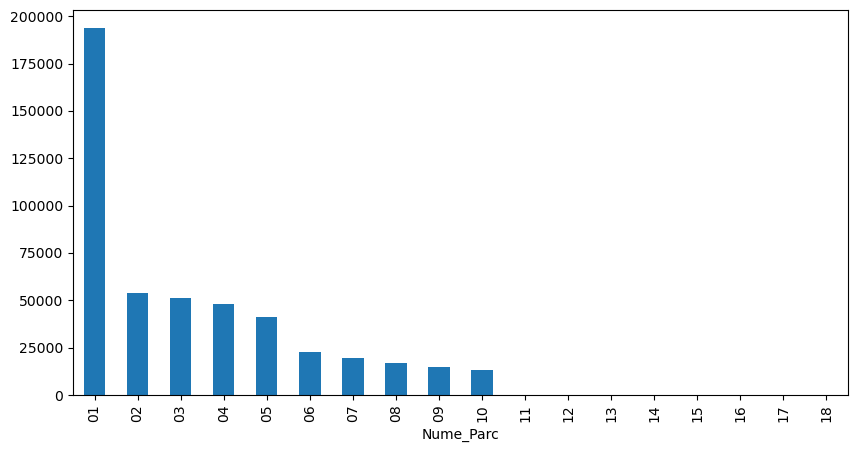

In [114]:
#ANALISANDO Nume_Parc
print(df_pagamentos['Nume_Parc'].describe())
print(df_pagamentos['Nume_Parc'].unique())
CriarGrafico(df_pagamentos,'Nume_Parc')

['1342' '1340' '6326' '6335' '1131' '1120' '1341' '1317' '1112' '1318'
 '6336' '2526' '6323']
Codi_Tipo
1120    333528
1131     43953
1317     30925
6335     27437
6326     26803
1342      6369
1318      2029
1340      1950
1341      1771
1112       467
6336       125
2526        87
6323         4
Name: count, dtype: int64


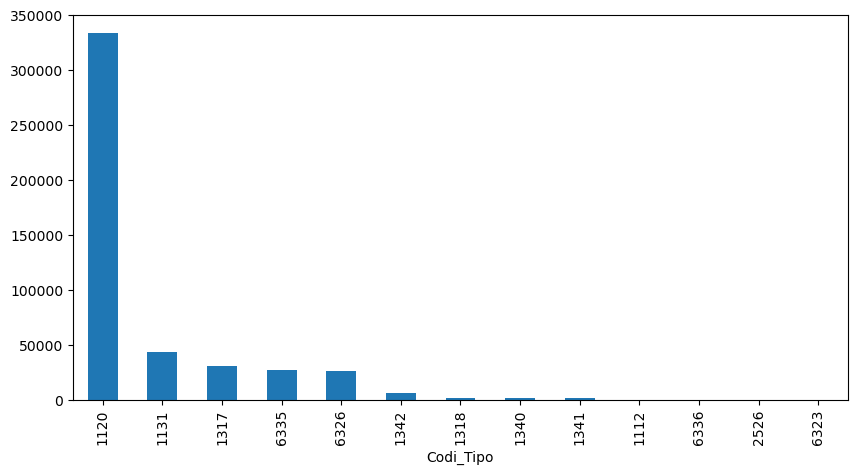

In [115]:
# ANALISANDO Codi_Tipo

print(df_pagamentos['Codi_Tipo'].unique())
CriarGrafico(df_pagamentos,'Codi_Tipo')

Codi_Tipo
1120    333528
1131     43953
1317     30925
6335     27437
6326     26803
1342      6369
1318      2029
1340      1950
1341      1771
1112       467
6336       125
2526        87
6323         4
Name: count, dtype: int64


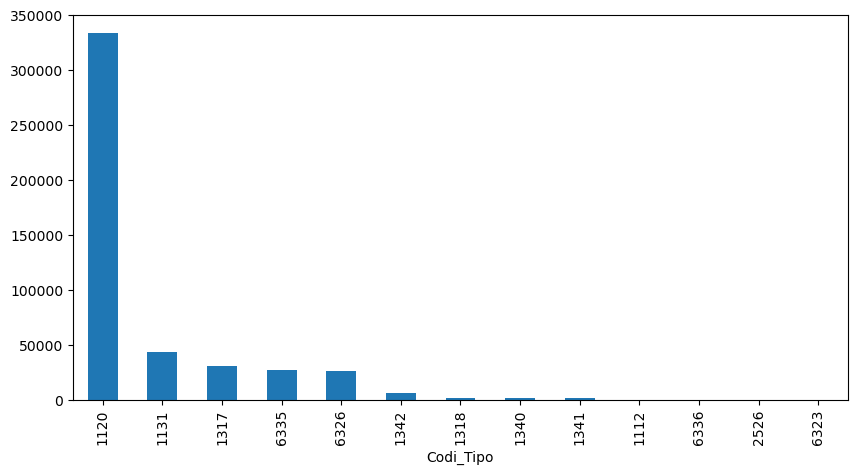

In [116]:
# ANALISE Codi_Tipo

CriarGrafico(df_pagamentos,'Codi_Tipo')

In [117]:
# DIVIDINDO Data_Paga

df_pagamentos['Ano_Paga'] = df_pagamentos['Data_Paga'].dt.year.astype('int64')
df_pagamentos['Mes_Paga'] = df_pagamentos['Data_Paga'].dt.month.astype('int64')
df_pagamentos['Dia_Paga'] = df_pagamentos['Data_Paga'].dt.day.astype('int64')


df_pagamentos.head()

,Nume_Titu,Nume_Parc,Codi_Tipo,Valor_Titulo,Data_Paga,Peri_Refe,Valor_Pago,Ano_Paga,Mes_Paga,Dia_Paga
0,202301633491,01,1342,291.324316,2023-04-26,202303,50.106382,2023,4,26
1,202301633491,02,1342,291.324316,2023-05-08,202303,48.552992,2023,5,8
2,202301633491,03,1342,291.324316,2023-06-07,202303,48.552992,2023,6,7
3,202301633491,04,1342,291.324316,2023-07-03,202303,48.552992,2023,7,3
4,202301633491,05,1342,291.324316,2023-08-07,202303,48.552992,2023,8,7


In [118]:
 # DIVIDINDO Peri_Refe

df_pagamentos['Ano_Peri'] = df_pagamentos['Peri_Refe'].str[:4]
df_pagamentos['Mes_Peri'] = df_pagamentos['Peri_Refe'].str[4:6]

df_pagamentos.head()

,Nume_Titu,Nume_Parc,Codi_Tipo,Valor_Titulo,Data_Paga,Peri_Refe,Valor_Pago,Ano_Paga,Mes_Paga,Dia_Paga,Ano_Peri,Mes_Peri
0,202301633491,01,1342,291.324316,2023-04-26,202303,50.106382,2023,4,26,2023,03
1,202301633491,02,1342,291.324316,2023-05-08,202303,48.552992,2023,5,8,2023,03
2,202301633491,03,1342,291.324316,2023-06-07,202303,48.552992,2023,6,7,2023,03
3,202301633491,04,1342,291.324316,2023-07-03,202303,48.552992,2023,7,3,2023,03
4,202301633491,05,1342,291.324316,2023-08-07,202303,48.552992,2023,8,7,2023,03


In [119]:


df_pagamentos['Ano_Peri'] = df_pagamentos['Ano_Peri'].astype('int64')
df_pagamentos['Mes_Peri'] = df_pagamentos['Mes_Peri']

df_pagamentos = df_pagamentos.drop(['Data_Paga', 'Peri_Refe'], axis=1)
df_pagamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475448 entries, 0 to 475447
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Nume_Titu     475448 non-null  int64  
 1   Nume_Parc     475448 non-null  object 
 2   Codi_Tipo     475448 non-null  object 
 3   Valor_Titulo  475448 non-null  float64
 4   Valor_Pago    475448 non-null  float64
 5   Ano_Paga      475448 non-null  int64  
 6   Mes_Paga      475448 non-null  int64  
 7   Dia_Paga      475448 non-null  int64  
 8   Ano_Peri      475448 non-null  int64  
 9   Mes_Peri      475448 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 36.3+ MB


In [120]:
df_pagamentos['Valor_Pago'].describe()

count    475448.000000
mean        253.623599
std        3175.482901
min           0.003183
25%          14.410240
50%          22.441395
75%          59.825415
max      421497.388522
Name: Valor_Pago, dtype: float64

In [121]:
AnaliseExploratoria(df_pagamentos,'Pagamentos')

Analise da tabela: Pagamentos
Primeiras 5 linhas:


,Nume_Titu,Nume_Parc,Codi_Tipo,Valor_Titulo,Valor_Pago,Ano_Paga,Mes_Paga,Dia_Paga,Ano_Peri,Mes_Peri
0,202301633491,01,1342,291.324316,50.106382,2023,4,26,2023,03
1,202301633491,02,1342,291.324316,48.552992,2023,5,8,2023,03
2,202301633491,03,1342,291.324316,48.552992,2023,6,7,2023,03
3,202301633491,04,1342,291.324316,48.552992,2023,7,3,2023,03
4,202301633491,05,1342,291.324316,48.552992,2023,8,7,2023,03



Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475448 entries, 0 to 475447
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Nume_Titu     475448 non-null  int64  
 1   Nume_Parc     475448 non-null  object 
 2   Codi_Tipo     475448 non-null  object 
 3   Valor_Titulo  475448 non-null  float64
 4   Valor_Pago    475448 non-null  float64
 5   Ano_Paga      475448 non-null  int64  
 6   Mes_Paga      475448 non-null  int64  
 7   Dia_Paga      475448 non-null  int64  
 8   Ano_Peri      475448 non-null  int64  
 9   Mes_Peri      475448 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 36.3+ MB


None


Descrição estatística:


,Nume_Titu,Nume_Parc,Codi_Tipo,Valor_Titulo,Valor_Pago,Ano_Paga,Mes_Paga,Dia_Paga,Ano_Peri,Mes_Peri
count,4.754480e+05,475448,475448,475448.000000,475448.000000,475448.000000,475448.000000,475448.000000,475448.000000,475448
unique,NaN,18,13,NaN,NaN,NaN,NaN,NaN,NaN,15
top,NaN,01,1120,NaN,NaN,NaN,NaN,NaN,NaN,
freq,NaN,193604,333528,NaN,NaN,NaN,NaN,NaN,NaN,378040
mean,2.023465e+11,NaN,NaN,310.668466,253.623599,2023.394497,5.842923,10.831992,2023.323091,NaN
std,5.444178e+07,NaN,NaN,3672.571021,3175.482901,0.490032,2.710692,7.945864,9.668129,NaN
min,2.000014e+11,NaN,NaN,-539.261936,0.003183,1999.000000,1.000000,1.000000,120.000000,NaN
25%,2.023009e+11,NaN,NaN,14.419790,14.410240,2023.000000,4.000000,6.000000,2023.000000,NaN
50%,2.023015e+11,NaN,NaN,23.727398,22.441395,2023.000000,5.000000,8.000000,2023.000000,NaN
75%,2.024010e+11,NaN,NaN,70.029884,59.825415,2024.000000,7.000000,14.000000,2024.000000,NaN



Valores nulos:


Nume_Titu       0
Nume_Parc       0
Codi_Tipo       0
Valor_Titulo    0
Valor_Pago      0
Ano_Paga        0
Mes_Paga        0
Dia_Paga        0
Ano_Peri        0
Mes_Peri        0
dtype: int64

# SITUAÇÃO

In [122]:
AnaliseExploratoria(df_situacao, 'Situação')

Analise da tabela: Situação
Primeiras 5 linhas:


,codi_situ,desc_situ,defi_situ
0,01,Ativo(a),O Título tem situação Ativo quando ele represe...
1,02,Pendente,A situação Pendente refere-se apenas ao Título...
2,03,Em Proposta,A situação Em Proposta se refere ao Título de ...
3,04,Em Acordo,"Apenas o Título de Parcelamento fica ""Em Acord..."
4,05,Liquidado(a),O Título de PAGAMENTO (Cota Única ou Parcelame...



Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   codi_situ  13 non-null     object
 1   desc_situ  13 non-null     object
 2   defi_situ  13 non-null     object
dtypes: object(3)
memory usage: 444.0+ bytes


None


Descrição estatística:


,codi_situ,desc_situ,defi_situ
count,13,13,13
unique,13,13,13
top,01,Ativo(a),O Título tem situação Ativo quando ele represe...
freq,1,1,1



Valores nulos:


codi_situ    0
desc_situ    0
defi_situ    0
dtype: int64

In [123]:
# CONVERTENDO A COLUNA codi_situ PARA INT

df_situacao['codi_situ'] = df_situacao['codi_situ'].astype('int64')

In [124]:
# ANALISANDO COLUNA desc_situ
print(df_situacao['desc_situ'].unique)
df_situacao.head(20)

<bound method Series.unique of 0                            Ativo(a)
1                            Pendente
2                         Em Proposta
3                           Em Acordo
4                        Liquidado(a)
5              Em Negociacao Pendente
6                             Quitado
7                           Em Dívida
8                           Executado
9                        Cancelado(a)
10           Suspenso(a) pela Justiça
11    Cancelado c/ Geração de Crédito
12           Suspensão Administrativa
Name: desc_situ, dtype: object>


,codi_situ,desc_situ,defi_situ
0,1,Ativo(a),O Título tem situação Ativo quando ele represe...
1,2,Pendente,A situação Pendente refere-se apenas ao Título...
2,3,Em Proposta,A situação Em Proposta se refere ao Título de ...
3,4,Em Acordo,"Apenas o Título de Parcelamento fica ""Em Acord..."
4,5,Liquidado(a),O Título de PAGAMENTO (Cota Única ou Parcelame...
5,6,Em Negociacao Pendente,Refere-se ao Título de Lançamento de Auto de I...
6,7,Quitado,Refere-se ao Título de Lançamento de Auto de I...
7,9,Em Dívida,Títulos em dívida.
8,10,Executado,"Título de Auto de Infração, quando o mesmo for..."
9,12,Cancelado(a),Quando um Título de Pagamento é Cancelado. Qua...


   # TIPOTRIBUTOS

In [125]:
AnaliseExploratoria(df_tipo_tributo, 'Tipo de Tributo')

Analise da tabela: Tipo de Tributo
Primeiras 5 linhas:


,codi_tipo,desc_tipo
0,1120,IPTU - Valor Parcelado
1,1131,IPTU - Valor Total
2,1317,ISS - Pessoa Jurídica - Valor Total
3,1318,ISS - Pessoa Jurídica - Valor Parcelado
4,1340,ISS - Pessoa Física - Cota Única c/ Desconto



Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   codi_tipo  16 non-null     object
 1   desc_tipo  16 non-null     object
dtypes: object(2)
memory usage: 388.0+ bytes


None


Descrição estatística:


,codi_tipo,desc_tipo
count,16,16
unique,16,16
top,1120,IPTU - Valor Parcelado
freq,1,1



Valores nulos:


codi_tipo    0
desc_tipo    0
dtype: int64

In [126]:
# ANALISE DA COLUNA desc_tipo

print(df_tipo_tributo['desc_tipo'].unique)
df_tipo_tributo.head(20)

<bound method Series.unique of 0                             IPTU  -  Valor Parcelado
1                                 IPTU  -  Valor Total
2              ISS  -  Pessoa Jurídica  -  Valor Total
3          ISS  -  Pessoa Jurídica  -  Valor Parcelado
4     ISS  -  Pessoa Física  -  Cota Única c/ Desconto
5                ISS  -  Pessoa Física  -  Valor Total
6            ISS  -  Pessoa Física  -  Valor Parcelado
7                 IPTU  -  Valor Total  (Dívida Ativa)
8              IPTU  -  Valor Parcelado (Dívida Ativa)
9                                   IPTU  -  CDA (CDA)
10                          IPTU  -  Valor Total (CDA)
11                                 TCR -  CDA (Dívida)
12                           TCR -  Valor Total  (CDA)
13                       TCR -  Valor Parcelado  (CDA)
14                                Lançamento Único TCR
15                               Lançamento Único IPTU
Name: desc_tipo, dtype: object>


,codi_tipo,desc_tipo
0,1120,IPTU - Valor Parcelado
1,1131,IPTU - Valor Total
2,1317,ISS - Pessoa Jurídica - Valor Total
3,1318,ISS - Pessoa Jurídica - Valor Parcelado
4,1340,ISS - Pessoa Física - Cota Única c/ Desconto
5,1341,ISS - Pessoa Física - Valor Total
6,1342,ISS - Pessoa Física - Valor Parcelado
7,6323,IPTU - Valor Total (Dívida Ativa)
8,6324,IPTU - Valor Parcelado (Dívida Ativa)
9,6325,IPTU - CDA (CDA)


In [127]:
# CONVERTENDO A COLUNA codi_tipo PARA INT

df_tipo_tributo['codi_tipo'] = df_tipo_tributo['codi_tipo'].astype('int64')

In [128]:
df_tipo_tributo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   codi_tipo  16 non-null     int64 
 1   desc_tipo  16 non-null     object
dtypes: int64(1), object(1)
memory usage: 388.0+ bytes


# TITULOS

In [129]:
AnaliseExploratoria (df_titulos, 'Titulos')

Analise da tabela: Titulos
Primeiras 5 linhas:


,nume_titu,codi_imov,codi_cont,data_lanc,peri_refe,valor_titulo,codi_tipo,codi_situ
0,202300714608,385239,NaN,2023-01-06 19:10:00,2023,33.474284,9998,09
1,202300714609,385240,NaN,2023-01-06 19:10:00,2023,12.980994,1120,05
2,202300714614,385242,NaN,2023-01-06 19:10:00,2023,23.730581,9998,09
3,202300714619,385245,NaN,2023-01-06 19:10:00,2023,122.647792,9999,09
4,202300714620,385245,NaN,2023-01-06 19:10:00,2023,24.978386,9998,09



Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704298 entries, 0 to 1704297
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   nume_titu     object 
 1   codi_imov     object 
 2   codi_cont     float64
 3   data_lanc     object 
 4   peri_refe     object 
 5   valor_titulo  float64
 6   codi_tipo     object 
 7   codi_situ     object 
dtypes: float64(2), object(6)
memory usage: 104.0+ MB


None


Descrição estatística:


,nume_titu,codi_imov,codi_cont,data_lanc,peri_refe,valor_titulo,codi_tipo,codi_situ
count,1704298,1455841,248431.000000,1704298,1704298,1.704298e+06,1704298,1704298
unique,1704298,276224,NaN,198464,25,NaN,15,11
top,202300714608,123555,NaN,2024-01-05 01:06:36.327000,2024,NaN,9998,01
freq,1,37,NaN,138415,398103,NaN,348559,516947
mean,NaN,NaN,107325.002633,NaN,NaN,2.109940e+02,NaN,NaN
std,NaN,NaN,74676.820178,NaN,NaN,3.382025e+03,NaN,NaN
min,NaN,NaN,16.000000,NaN,NaN,-5.392619e+02,NaN,NaN
25%,NaN,NaN,52707.000000,NaN,NaN,1.413967e+01,NaN,NaN
50%,NaN,NaN,89502.000000,NaN,NaN,3.300636e+01,NaN,NaN
75%,NaN,NaN,119563.000000,NaN,NaN,9.976712e+01,NaN,NaN



Valores nulos:


nume_titu             0
codi_imov        248457
codi_cont       1455867
data_lanc             0
peri_refe             0
valor_titulo          0
codi_tipo             0
codi_situ             0
dtype: int64

In [130]:
# REMOVENDO VALORES NULOS PARA CONVERTER A COLUNA codi_imov PARA INTEIRO
df_titulos = df_titulos.dropna(subset=['codi_imov'])

df_titulos['codi_imov'] = df_titulos['codi_imov'].astype('int64')
#df_titulos['codi_imov'].info()
df_titulos.head()

,nume_titu,codi_imov,codi_cont,data_lanc,peri_refe,valor_titulo,codi_tipo,codi_situ
0,202300714608,385239,NaN,2023-01-06 19:10:00,2023,33.474284,9998,09
1,202300714609,385240,NaN,2023-01-06 19:10:00,2023,12.980994,1120,05
2,202300714614,385242,NaN,2023-01-06 19:10:00,2023,23.730581,9998,09
3,202300714619,385245,NaN,2023-01-06 19:10:00,2023,122.647792,9999,09
4,202300714620,385245,NaN,2023-01-06 19:10:00,2023,24.978386,9998,09


In [131]:
#SUBSTITUINDO NULOS POR 0 PARA CONVERTER A COLUNA codi_cont

df_titulos['codi_cont'] = pd.to_numeric(df_titulos['codi_cont'], errors='coerce')

df_titulos['codi_cont'].fillna(0, inplace=True)
df_titulos['codi_cont'] = df_titulos['codi_cont'].astype('int64')
df_titulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1455841 entries, 0 to 1704297
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   nume_titu     1455841 non-null  object 
 1   codi_imov     1455841 non-null  int64  
 2   codi_cont     1455841 non-null  int64  
 3   data_lanc     1455841 non-null  object 
 4   peri_refe     1455841 non-null  object 
 5   valor_titulo  1455841 non-null  float64
 6   codi_tipo     1455841 non-null  object 
 7   codi_situ     1455841 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 100.0+ MB


In [132]:
# CORRIGINDO COLUNA data_lanc
df_titulos['data_lanc'] = pd.to_datetime(df_titulos['data_lanc'], errors='coerce')


print(df_titulos['data_lanc'].info())
invalid_dates = df_titulos[df_titulos['data_lanc'].isna()]
print("\nValores problematicos:\n", invalid_dates)

<class 'pandas.core.series.Series'>
Index: 1455841 entries, 0 to 1704297
Series name: data_lanc
Non-Null Count    Dtype         
--------------    -----         
1455840 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 22.2 MB
None

Valores problematicos:
             nume_titu  codi_imov  codi_cont data_lanc peri_refe  valor_titulo  \
1413370  200001385559     156588          0       NaT    299908    237.983827   

        codi_tipo codi_situ  
1413370      6326        05  


In [133]:
df_titulos.head()

,nume_titu,codi_imov,codi_cont,data_lanc,peri_refe,valor_titulo,codi_tipo,codi_situ
0,202300714608,385239,0,2023-01-06 19:10:00,2023,33.474284,9998,09
1,202300714609,385240,0,2023-01-06 19:10:00,2023,12.980994,1120,05
2,202300714614,385242,0,2023-01-06 19:10:00,2023,23.730581,9998,09
3,202300714619,385245,0,2023-01-06 19:10:00,2023,122.647792,9999,09
4,202300714620,385245,0,2023-01-06 19:10:00,2023,24.978386,9998,09


In [134]:
# REMOVENDO O VALOR PROBLEMATICO
df_titulos = df_titulos.dropna(subset=['data_lanc'])


In [135]:
# DIVIDINDO data_lanc

df_titulos['Ano_Lanc'] = df_titulos['data_lanc'].dt.year.astype('int64')
df_titulos['Mes_Lanc'] = df_titulos['data_lanc'].dt.month.astype('int64')
df_titulos['Horas_Lanc'] = df_titulos['data_lanc'].dt.hour.astype('int64')

df_titulos['data_lanc'] = df_titulos['data_lanc'].dt.strftime('%Y-%m')

print(df_titulos.info())
df_titulos.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1455840 entries, 0 to 1704297
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   nume_titu     1455840 non-null  object 
 1   codi_imov     1455840 non-null  int64  
 2   codi_cont     1455840 non-null  int64  
 3   data_lanc     1455840 non-null  object 
 4   peri_refe     1455840 non-null  object 
 5   valor_titulo  1455840 non-null  float64
 6   codi_tipo     1455840 non-null  object 
 7   codi_situ     1455840 non-null  object 
 8   Ano_Lanc      1455840 non-null  int64  
 9   Mes_Lanc      1455840 non-null  int64  
 10  Horas_Lanc    1455840 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 133.3+ MB
None


,nume_titu,codi_imov,codi_cont,data_lanc,peri_refe,valor_titulo,codi_tipo,codi_situ,Ano_Lanc,Mes_Lanc,Horas_Lanc
0,202300714608,385239,0,2023-01,2023,33.474284,9998,09,2023,1,19
1,202300714609,385240,0,2023-01,2023,12.980994,1120,05,2023,1,19
2,202300714614,385242,0,2023-01,2023,23.730581,9998,09,2023,1,19
3,202300714619,385245,0,2023-01,2023,122.647792,9999,09,2023,1,19
4,202300714620,385245,0,2023-01,2023,24.978386,9998,09,2023,1,19


In [136]:
# CONVERTENDO A COLUINA peri_refe EM DATETIME (primeiro conferi se realmente estava pegando apenas os 4 digitos do ano)
df_titulos['peri_refe'] = df_titulos['peri_refe'].astype(str).str[:4].astype('int64')


In [137]:
df_titulos['peri_refe'].value_counts()

peri_refe
2024    775390
2023    680449
2201         1
Name: count, dtype: int64

In [138]:
# REMOVENDO VALOR 
df_titulos = df_titulos[df_titulos['peri_refe'] != 2201]

In [139]:
# CONVERTENDO A COLUNA nume_titu PARA INT

df_titulos['nume_titu'] = df_titulos['nume_titu'].astype('int64')

In [140]:
# ANALISANDO A COLUNA valor_titulo 

df_titulos['valor_titulo'].describe()

count    1.455839e+06
mean     6.976452e+01
std      4.125028e+02
min     -5.392619e+02
25%      1.247169e+01
50%      2.429082e+01
75%      7.621480e+01
max      1.248205e+05
Name: valor_titulo, dtype: float64

In [141]:
# CONVERTENDO A COLUNA codi_situ EM INT

df_titulos['codi_situ'] = df_titulos['codi_situ'].astype('int64')

In [142]:
# CONVERTENDO A COLUNA codi_tipo EM INT

df_titulos['codi_tipo'] = df_titulos['codi_tipo'].astype('int64')
df_titulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1455839 entries, 0 to 1704297
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   nume_titu     1455839 non-null  int64  
 1   codi_imov     1455839 non-null  int64  
 2   codi_cont     1455839 non-null  int64  
 3   data_lanc     1455839 non-null  object 
 4   peri_refe     1455839 non-null  int64  
 5   valor_titulo  1455839 non-null  float64
 6   codi_tipo     1455839 non-null  int64  
 7   codi_situ     1455839 non-null  int64  
 8   Ano_Lanc      1455839 non-null  int64  
 9   Mes_Lanc      1455839 non-null  int64  
 10  Horas_Lanc    1455839 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 133.3+ MB


In [143]:
df_titulos

,nume_titu,codi_imov,codi_cont,data_lanc,peri_refe,valor_titulo,codi_tipo,codi_situ,Ano_Lanc,Mes_Lanc,Horas_Lanc
0,202300714608,385239,0,2023-01,2023,33.474284,9998,9,2023,1,19
1,202300714609,385240,0,2023-01,2023,12.980994,1120,5,2023,1,19
2,202300714614,385242,0,2023-01,2023,23.730581,9998,9,2023,1,19
3,202300714619,385245,0,2023-01,2023,122.647792,9999,9,2023,1,19
4,202300714620,385245,0,2023-01,2023,24.978386,9998,9,2023,1,19
...,...,...,...,...,...,...,...,...,...,...,...
1704293,202300574148,205358,0,2023-01,2023,35.170917,6334,1,2023,1,2
1704294,202300574149,205359,0,2023-01,2023,35.170917,6334,1,2023,1,2
1704295,202300574150,205558,0,2023-01,2023,35.170917,6334,1,2023,1,2
1704296,202300574151,203628,0,2023-01,2023,35.170917,6334,1,2023,1,2


# JUNCAO DO DF FINAL

In [144]:
# JOIN TITULOS E IMOVEIS

df_titu_imov = df_titulos.merge(df_imoveis, left_on='codi_imov', right_on='Codi_Imov', how='inner')
print(len(df_titulos))
print(len(df_imoveis))
print(len(df_titu_imov))

1455839
268810
1432446


In [145]:
df_titu_imov.head()

,nume_titu,codi_imov,codi_cont,data_lanc,peri_refe,valor_titulo,codi_tipo,codi_situ,Ano_Lanc,Mes_Lanc,...,Desc_Bair,Coleta,Rede_Esgo,Garagem,Area_Terreno,Area_Predial,Patrimonio,VV_EDIFICACAO,VV_TERRENO,VV_TOTAL_IMOVEL
0,202300714608,385239,0,2023-01,2023,33.474284,9998,9,2023,1,...,PRAIA DOS CORAIS,SIM,SEM REDE DE ESGOTO ...,SIM,0.11398,1.146108,PRIVADO,1.366225,0.513386,1.269726
1,202300714607,385239,0,2023-01,2023,156.456310,9999,9,2023,1,...,PRAIA DOS CORAIS,SIM,SEM REDE DE ESGOTO ...,SIM,0.11398,1.146108,PRIVADO,1.366225,0.513386,1.269726
2,202400543909,385239,0,2024-01,2024,42.368080,6334,1,2024,1,...,PRAIA DOS CORAIS,SIM,SEM REDE DE ESGOTO ...,SIM,0.11398,1.146108,PRIVADO,1.366225,0.513386,1.269726
3,202400196051,385239,0,2024-01,2024,198.028595,6325,1,2024,1,...,PRAIA DOS CORAIS,SIM,SEM REDE DE ESGOTO ...,SIM,0.11398,1.146108,PRIVADO,1.366225,0.513386,1.269726
4,202300557186,385239,0,2023-01,2023,40.378594,6334,1,2023,1,...,PRAIA DOS CORAIS,SIM,SEM REDE DE ESGOTO ...,SIM,0.11398,1.146108,PRIVADO,1.366225,0.513386,1.269726


In [146]:
print(len(df_titu_imov.columns))
print(len(df_titulos.columns))
print(len(df_imoveis.columns))

24
11
13


In [147]:
df_titu_imov.columns

Index(['nume_titu', 'codi_imov', 'codi_cont', 'data_lanc', 'peri_refe',
       'valor_titulo', 'codi_tipo', 'codi_situ', 'Ano_Lanc', 'Mes_Lanc',
       'Horas_Lanc', 'Codi_Imov', 'Atividade', 'Tipo_Imovel', 'Desc_Bair',
       'Coleta', 'Rede_Esgo', 'Garagem', 'Area_Terreno', 'Area_Predial',
       'Patrimonio', 'VV_EDIFICACAO', 'VV_TERRENO', 'VV_TOTAL_IMOVEL'],
      dtype='object')

In [148]:
df_titu_imov = df_titu_imov.drop(columns='Codi_Imov')

In [149]:
df_titu_imov

,nume_titu,codi_imov,codi_cont,data_lanc,peri_refe,valor_titulo,codi_tipo,codi_situ,Ano_Lanc,Mes_Lanc,...,Desc_Bair,Coleta,Rede_Esgo,Garagem,Area_Terreno,Area_Predial,Patrimonio,VV_EDIFICACAO,VV_TERRENO,VV_TOTAL_IMOVEL
0,202300714608,385239,0,2023-01,2023,33.474284,9998,9,2023,1,...,PRAIA DOS CORAIS,SIM,SEM REDE DE ESGOTO ...,SIM,0.113980,1.146108,PRIVADO,1.366225,0.513386,1.269726
1,202300714607,385239,0,2023-01,2023,156.456310,9999,9,2023,1,...,PRAIA DOS CORAIS,SIM,SEM REDE DE ESGOTO ...,SIM,0.113980,1.146108,PRIVADO,1.366225,0.513386,1.269726
2,202400543909,385239,0,2024-01,2024,42.368080,6334,1,2024,1,...,PRAIA DOS CORAIS,SIM,SEM REDE DE ESGOTO ...,SIM,0.113980,1.146108,PRIVADO,1.366225,0.513386,1.269726
3,202400196051,385239,0,2024-01,2024,198.028595,6325,1,2024,1,...,PRAIA DOS CORAIS,SIM,SEM REDE DE ESGOTO ...,SIM,0.113980,1.146108,PRIVADO,1.366225,0.513386,1.269726
4,202300557186,385239,0,2023-01,2023,40.378594,6334,1,2023,1,...,PRAIA DOS CORAIS,SIM,SEM REDE DE ESGOTO ...,SIM,0.113980,1.146108,PRIVADO,1.366225,0.513386,1.269726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432441,202300701224,93206,0,2023-01,2023,215.599730,1131,5,2023,1,...,PRAIA DOS CORAIS,SIM,SEM REDE DE ESGOTO ...,SIM,0.113980,1.699069,PRIVADO,1.381092,4.621444,1.751660
1432442,202300701232,93211,0,2023-01,2023,224.194306,1131,5,2023,1,...,PRAIA DOS CORAIS,SIM,SEM REDE DE ESGOTO ...,SIM,0.113980,1.450785,PRIVADO,1.682840,3.733769,1.917867
1432443,202300701240,93217,0,2023-01,2023,25.742349,1120,5,2023,1,...,PRAIA DOS CORAIS,SIM,SEM REDE DE ESGOTO ...,SIM,0.113980,1.522028,PRIVADO,1.765478,4.621444,2.092415
1432444,202300602911,224335,0,2023-01,2023,24.357667,6334,1,2023,1,...,VILA AMÉRICO,SIM,SEM REDE DE ESGOTO ...,NAO,0.106065,0.249837,PRIVADO,0.706618,0.034298,0.630324


In [150]:
# JOIN TITU_PAG COM PAGAMENTOS

df_titu_pag = df_titu_imov.merge(df_pagamentos, left_on='nume_titu', right_on='Nume_Titu', how='inner')
print(len(df_titu_imov))
print(len(df_pagamentos))
print(len(df_titu_pag))

1432446
475448
429620


In [151]:
df_titu_pag = df_titu_pag.drop(columns='Nume_Titu')

In [152]:
df_titu_pag.columns

Index(['nume_titu', 'codi_imov', 'codi_cont', 'data_lanc', 'peri_refe',
       'valor_titulo', 'codi_tipo', 'codi_situ', 'Ano_Lanc', 'Mes_Lanc',
       'Horas_Lanc', 'Atividade', 'Tipo_Imovel', 'Desc_Bair', 'Coleta',
       'Rede_Esgo', 'Garagem', 'Area_Terreno', 'Area_Predial', 'Patrimonio',
       'VV_EDIFICACAO', 'VV_TERRENO', 'VV_TOTAL_IMOVEL', 'Nume_Parc',
       'Codi_Tipo', 'Valor_Titulo', 'Valor_Pago', 'Ano_Paga', 'Mes_Paga',
       'Dia_Paga', 'Ano_Peri', 'Mes_Peri'],
      dtype='object')

In [153]:
df_titu_pag.head()

,nume_titu,codi_imov,codi_cont,data_lanc,peri_refe,valor_titulo,codi_tipo,codi_situ,Ano_Lanc,Mes_Lanc,...,VV_TOTAL_IMOVEL,Nume_Parc,Codi_Tipo,Valor_Titulo,Valor_Pago,Ano_Paga,Mes_Paga,Dia_Paga,Ano_Peri,Mes_Peri
0,202300714609,385240,0,2023-01,2023,12.980994,1120,5,2023,1,...,0.996911,01,1120,12.980994,12.980994,2023,3,1,2023,
1,202300714609,385240,0,2023-01,2023,12.980994,1120,5,2023,1,...,0.996911,02,1120,12.980994,12.980994,2023,3,22,2023,
2,202300714609,385240,0,2023-01,2023,12.980994,1120,5,2023,1,...,0.996911,03,1120,12.980994,12.980994,2023,5,8,2023,
3,202300714609,385240,0,2023-01,2023,12.980994,1120,5,2023,1,...,0.996911,04,1120,12.980994,12.980994,2023,6,7,2023,
4,202300714609,385240,0,2023-01,2023,12.980994,1120,5,2023,1,...,0.996911,05,1120,12.980994,13.604896,2023,7,31,2023,


In [154]:
#JOIN TITU_PAG E SITUACAO

df_titu_situ = df_titu_pag.merge(df_situacao, left_on='codi_situ', right_on='codi_situ', how='inner')
print(len(df_titu_pag))
print(len(df_situacao))
print(len(df_titu_situ))

429620
13
429620


In [155]:
df_titu_situ = df_titu_situ.drop(columns='codi_situ')
df_titu_pag.columns

Index(['nume_titu', 'codi_imov', 'codi_cont', 'data_lanc', 'peri_refe',
       'valor_titulo', 'codi_tipo', 'codi_situ', 'Ano_Lanc', 'Mes_Lanc',
       'Horas_Lanc', 'Atividade', 'Tipo_Imovel', 'Desc_Bair', 'Coleta',
       'Rede_Esgo', 'Garagem', 'Area_Terreno', 'Area_Predial', 'Patrimonio',
       'VV_EDIFICACAO', 'VV_TERRENO', 'VV_TOTAL_IMOVEL', 'Nume_Parc',
       'Codi_Tipo', 'Valor_Titulo', 'Valor_Pago', 'Ano_Paga', 'Mes_Paga',
       'Dia_Paga', 'Ano_Peri', 'Mes_Peri'],
      dtype='object')

In [156]:
df_titulos

,nume_titu,codi_imov,codi_cont,data_lanc,peri_refe,valor_titulo,codi_tipo,codi_situ,Ano_Lanc,Mes_Lanc,Horas_Lanc
0,202300714608,385239,0,2023-01,2023,33.474284,9998,9,2023,1,19
1,202300714609,385240,0,2023-01,2023,12.980994,1120,5,2023,1,19
2,202300714614,385242,0,2023-01,2023,23.730581,9998,9,2023,1,19
3,202300714619,385245,0,2023-01,2023,122.647792,9999,9,2023,1,19
4,202300714620,385245,0,2023-01,2023,24.978386,9998,9,2023,1,19
...,...,...,...,...,...,...,...,...,...,...,...
1704293,202300574148,205358,0,2023-01,2023,35.170917,6334,1,2023,1,2
1704294,202300574149,205359,0,2023-01,2023,35.170917,6334,1,2023,1,2
1704295,202300574150,205558,0,2023-01,2023,35.170917,6334,1,2023,1,2
1704296,202300574151,203628,0,2023-01,2023,35.170917,6334,1,2023,1,2


In [157]:
#JOIN TITU_SITU E TIPO_TRIBUTO

df_titu_trib = df_titu_situ.merge(df_tipo_tributo, left_on='codi_tipo', right_on='codi_tipo', how='inner')
print(len(df_titu_situ))
print(len(df_tipo_tributo))
print(len(df_titu_trib))

429620
16
429620


In [158]:
df_titu_trib.head()

,nume_titu,codi_imov,codi_cont,data_lanc,peri_refe,valor_titulo,codi_tipo,Ano_Lanc,Mes_Lanc,Horas_Lanc,...,Valor_Titulo,Valor_Pago,Ano_Paga,Mes_Paga,Dia_Paga,Ano_Peri,Mes_Peri,desc_situ,defi_situ,desc_tipo
0,202300714609,385240,0,2023-01,2023,12.980994,1120,2023,1,19,...,12.980994,12.980994,2023,3,1,2023,,Liquidado(a),O Título de PAGAMENTO (Cota Única ou Parcelame...,IPTU - Valor Parcelado
1,202300714609,385240,0,2023-01,2023,12.980994,1120,2023,1,19,...,12.980994,12.980994,2023,3,22,2023,,Liquidado(a),O Título de PAGAMENTO (Cota Única ou Parcelame...,IPTU - Valor Parcelado
2,202300714609,385240,0,2023-01,2023,12.980994,1120,2023,1,19,...,12.980994,12.980994,2023,5,8,2023,,Liquidado(a),O Título de PAGAMENTO (Cota Única ou Parcelame...,IPTU - Valor Parcelado
3,202300714609,385240,0,2023-01,2023,12.980994,1120,2023,1,19,...,12.980994,12.980994,2023,6,7,2023,,Liquidado(a),O Título de PAGAMENTO (Cota Única ou Parcelame...,IPTU - Valor Parcelado
4,202300714609,385240,0,2023-01,2023,12.980994,1120,2023,1,19,...,12.980994,13.604896,2023,7,31,2023,,Liquidado(a),O Título de PAGAMENTO (Cota Única ou Parcelame...,IPTU - Valor Parcelado


In [159]:
# REMOVENDO COLUNAS FORA DO FEATURES

ColRemov = ['nume_titu', 'codi_imov', 'codi_cont', 'codi_tipo', 'defi_situ']

df_final = df_titu_trib.drop(columns=ColRemov)
print(df_final.columns)
df_final

Index(['data_lanc', 'peri_refe', 'valor_titulo', 'Ano_Lanc', 'Mes_Lanc',
       'Horas_Lanc', 'Atividade', 'Tipo_Imovel', 'Desc_Bair', 'Coleta',
       'Rede_Esgo', 'Garagem', 'Area_Terreno', 'Area_Predial', 'Patrimonio',
       'VV_EDIFICACAO', 'VV_TERRENO', 'VV_TOTAL_IMOVEL', 'Nume_Parc',
       'Codi_Tipo', 'Valor_Titulo', 'Valor_Pago', 'Ano_Paga', 'Mes_Paga',
       'Dia_Paga', 'Ano_Peri', 'Mes_Peri', 'desc_situ', 'desc_tipo'],
      dtype='object')


,data_lanc,peri_refe,valor_titulo,Ano_Lanc,Mes_Lanc,Horas_Lanc,Atividade,Tipo_Imovel,Desc_Bair,Coleta,...,Codi_Tipo,Valor_Titulo,Valor_Pago,Ano_Paga,Mes_Paga,Dia_Paga,Ano_Peri,Mes_Peri,desc_situ,desc_tipo
0,2023-01,2023,12.980994,2023,1,19,RESIDENCIAIS ...,PREDIAL,PRAIA DOS CORAIS,SIM,...,1120,12.980994,12.980994,2023,3,1,2023,,Liquidado(a),IPTU - Valor Parcelado
1,2023-01,2023,12.980994,2023,1,19,RESIDENCIAIS ...,PREDIAL,PRAIA DOS CORAIS,SIM,...,1120,12.980994,12.980994,2023,3,22,2023,,Liquidado(a),IPTU - Valor Parcelado
2,2023-01,2023,12.980994,2023,1,19,RESIDENCIAIS ...,PREDIAL,PRAIA DOS CORAIS,SIM,...,1120,12.980994,12.980994,2023,5,8,2023,,Liquidado(a),IPTU - Valor Parcelado
3,2023-01,2023,12.980994,2023,1,19,RESIDENCIAIS ...,PREDIAL,PRAIA DOS CORAIS,SIM,...,1120,12.980994,12.980994,2023,6,7,2023,,Liquidado(a),IPTU - Valor Parcelado
4,2023-01,2023,12.980994,2023,1,19,RESIDENCIAIS ...,PREDIAL,PRAIA DOS CORAIS,SIM,...,1120,12.980994,13.604896,2023,7,31,2023,,Liquidado(a),IPTU - Valor Parcelado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429615,2024-06,2024,143.258860,2024,6,9,RESIDENCIAIS ...,PREDIAL,VILA AMÉRICO,SIM,...,6336,143.258860,31.516631,2024,6,10,2024,06,Em Acordo,TCR - Valor Parcelado (CDA)
429616,2024-06,2024,143.258860,2024,6,9,RESIDENCIAIS ...,PREDIAL,VILA AMÉRICO,SIM,...,6336,143.258860,31.729904,2024,7,2,2024,06,Em Acordo,TCR - Valor Parcelado (CDA)
429617,2023-01,2023,0.000000,2023,1,20,RESIDENCIAIS ...,PREDIAL,COLINAS DA CRUZ,SIM,...,1120,0.000000,16.495221,2023,3,7,2023,,Liquidado(a),Lançamento Único IPTU
429618,2023-01,2023,0.000000,2023,1,20,RESIDENCIAIS ...,PREDIAL,COLINAS DA CRUZ,SIM,...,1120,0.000000,16.495221,2023,3,7,2023,,Liquidado(a),Lançamento Único IPTU


In [160]:
df_final.isnull().sum()

data_lanc          0
peri_refe          0
valor_titulo       0
Ano_Lanc           0
Mes_Lanc           0
Horas_Lanc         0
Atividade          0
Tipo_Imovel        0
Desc_Bair          0
Coleta             0
Rede_Esgo          0
Garagem            0
Area_Terreno       0
Area_Predial       0
Patrimonio         0
VV_EDIFICACAO      0
VV_TERRENO         0
VV_TOTAL_IMOVEL    0
Nume_Parc          0
Codi_Tipo          0
Valor_Titulo       0
Valor_Pago         0
Ano_Paga           0
Mes_Paga           0
Dia_Paga           0
Ano_Peri           0
Mes_Peri           0
desc_situ          0
desc_tipo          0
dtype: int64

In [161]:
df_final['desc_situ'].unique()

array(['Liquidado(a)', 'Em Acordo', 'Em Dívida', 'Cancelado(a)',
       'Suspenso(a) pela Justiça', 'Cancelado c/ Geração de Crédito',
       'Em Proposta'], dtype=object)

In [162]:
def inadiplencia(df):
    inadimplencia = ["Em Dívida", "Cancelado(a)", "Suspenso(a) pela Justiça", "Em Proposta"]

    df['Inadiplente'] = 'NAO'
    
    df.loc[df['desc_situ'] == "Em Dívida", 'Inadiplente'] = 'SIM'
    df.loc[df['desc_situ'] == "Cancelado(a)", 'Inadiplente'] = 'SIM'
    df.loc[df['desc_situ'] == "Suspenso(a) pela Justiça", 'Inadiplente'] = 'SIM'
    df.loc[df['desc_situ'] == "Em Proposta", 'Inadiplente'] = 'SIM'
    
    return df

In [163]:
inadiplencia(df_final)

,data_lanc,peri_refe,valor_titulo,Ano_Lanc,Mes_Lanc,Horas_Lanc,Atividade,Tipo_Imovel,Desc_Bair,Coleta,...,Valor_Titulo,Valor_Pago,Ano_Paga,Mes_Paga,Dia_Paga,Ano_Peri,Mes_Peri,desc_situ,desc_tipo,Inadiplente
0,2023-01,2023,12.980994,2023,1,19,RESIDENCIAIS ...,PREDIAL,PRAIA DOS CORAIS,SIM,...,12.980994,12.980994,2023,3,1,2023,,Liquidado(a),IPTU - Valor Parcelado,NAO
1,2023-01,2023,12.980994,2023,1,19,RESIDENCIAIS ...,PREDIAL,PRAIA DOS CORAIS,SIM,...,12.980994,12.980994,2023,3,22,2023,,Liquidado(a),IPTU - Valor Parcelado,NAO
2,2023-01,2023,12.980994,2023,1,19,RESIDENCIAIS ...,PREDIAL,PRAIA DOS CORAIS,SIM,...,12.980994,12.980994,2023,5,8,2023,,Liquidado(a),IPTU - Valor Parcelado,NAO
3,2023-01,2023,12.980994,2023,1,19,RESIDENCIAIS ...,PREDIAL,PRAIA DOS CORAIS,SIM,...,12.980994,12.980994,2023,6,7,2023,,Liquidado(a),IPTU - Valor Parcelado,NAO
4,2023-01,2023,12.980994,2023,1,19,RESIDENCIAIS ...,PREDIAL,PRAIA DOS CORAIS,SIM,...,12.980994,13.604896,2023,7,31,2023,,Liquidado(a),IPTU - Valor Parcelado,NAO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429615,2024-06,2024,143.258860,2024,6,9,RESIDENCIAIS ...,PREDIAL,VILA AMÉRICO,SIM,...,143.258860,31.516631,2024,6,10,2024,06,Em Acordo,TCR - Valor Parcelado (CDA),NAO
429616,2024-06,2024,143.258860,2024,6,9,RESIDENCIAIS ...,PREDIAL,VILA AMÉRICO,SIM,...,143.258860,31.729904,2024,7,2,2024,06,Em Acordo,TCR - Valor Parcelado (CDA),NAO
429617,2023-01,2023,0.000000,2023,1,20,RESIDENCIAIS ...,PREDIAL,COLINAS DA CRUZ,SIM,...,0.000000,16.495221,2023,3,7,2023,,Liquidado(a),Lançamento Único IPTU,NAO
429618,2023-01,2023,0.000000,2023,1,20,RESIDENCIAIS ...,PREDIAL,COLINAS DA CRUZ,SIM,...,0.000000,16.495221,2023,3,7,2023,,Liquidado(a),Lançamento Único IPTU,NAO


Inadiplente
NAO    394595
SIM     35025
Name: count, dtype: int64


<Axes: xlabel='Inadiplente'>

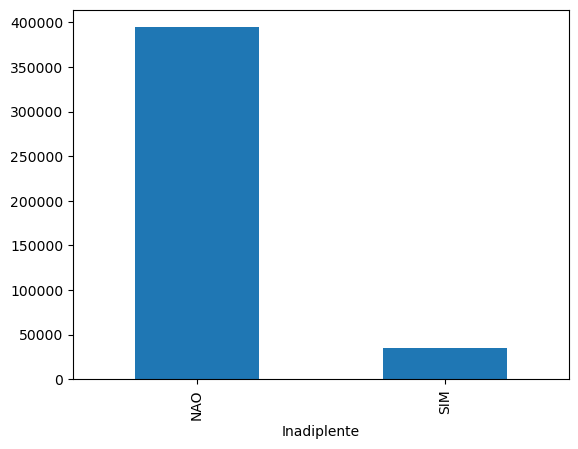

In [164]:
InadiplenciaCount = df_final['Inadiplente'].value_counts()
print(InadiplenciaCount)
InadiplenciaCount.plot(kind='bar')

In [165]:
SituacaoCount = df_final['desc_situ'].value_counts()
SituacaoCount

desc_situ
Liquidado(a)                       281116
Em Acordo                          113475
Em Dívida                           34904
Cancelado(a)                           46
Em Proposta                            46
Suspenso(a) pela Justiça               29
Cancelado c/ Geração de Crédito         4
Name: count, dtype: int64

In [166]:
# CONFERINDO SE OS VALORES CORRESPONDEM

nao = 270577 + 112801 + 4

print("NAO:",nao)
print("SIM:", len(df_final['desc_situ']) - nao)

NAO: 383382
SIM: 46238


In [167]:
# SALVANDO ARQUIVO COMO CSV

df_final.to_csv(r'C:\Users\Raul\Desktop\Projeto\dado_modelagem.csv', index=False)